# Recurrent Neural Network - LSTM -  Weekly

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

Using TensorFlow backend.


### Loading the Data

In [2]:
with open("week_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preprocessing Data

### Functions to prepare the data for LSTM

In [3]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [4]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

### Splitting the Data

In [240]:
# How many periods looking back to predict
n_per_in  = 36

# How many periods to predict
n_per_out = 12

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))


## Modeling - LSTM (RNN)

### Creating the Neural Network

In [241]:
# Instatiating the model
model = Sequential()

activ = "tanh"
# Input layer
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers (10)
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))

model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))

model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))

model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ)))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_89 (LSTM)               (None, 36, 100)           40800     
_________________________________________________________________
bidirectional_81 (Bidirectio (None, 36, 100)           60400     
_________________________________________________________________
bidirectional_82 (Bidirectio (None, 36, 100)           60400     
_________________________________________________________________
bidirectional_83 (Bidirectio (None, 36, 100)           60400     
_________________________________________________________________
bidirectional_84 (Bidirectio (None, 36, 100)           60400     
_________________________________________________________________
bidirectional_85 (Bidirectio (None, 36, 100)           60400     
_________________________________________________________________
bidirectional_86 (Bidirectio (None, 36, 100)          

In [242]:
# Compiling the data with specifications
model.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])

### Fitting and Training the RNN

In [243]:
res = model.fit(X, y, epochs=90, batch_size=16, validation_split=0.01)

Train on 943 samples, validate on 10 samples
Epoch 1/90
943/943 [==============================] - 47s 50ms/step - loss: 100.6398 - accuracy: 0.0912 - val_loss: 506.6873 - val_accuracy: 0.0000e+00
Epoch 2/90
943/943 [==============================] - 29s 31ms/step - loss: 62.9476 - accuracy: 0.0901 - val_loss: 431.8246 - val_accuracy: 0.0000e+00
Epoch 3/90
943/943 [==============================] - 28s 30ms/step - loss: 61.7397 - accuracy: 0.1220 - val_loss: 431.3753 - val_accuracy: 0.0000e+00
Epoch 4/90
943/943 [==============================] - 28s 30ms/step - loss: 61.7597 - accuracy: 0.0827 - val_loss: 420.4079 - val_accuracy: 0.0000e+00
Epoch 5/90
943/943 [==============================] - 28s 30ms/step - loss: 61.7104 - accuracy: 0.1103 - val_loss: 428.3511 - val_accuracy: 0.1000
Epoch 6/90
943/943 [==============================] - 25s 27ms/step - loss: 61.7196 - accuracy: 0.0721 - val_loss: 429.0262 - val_accuracy: 0.1000
Epoch 7/90
943/943 [==============================] - 22

943/943 [==============================] - 28s 30ms/step - loss: 61.7525 - accuracy: 0.1453 - val_loss: 429.2366 - val_accuracy: 0.0000e+00
Epoch 56/90
943/943 [==============================] - 29s 30ms/step - loss: 61.7062 - accuracy: 0.1495 - val_loss: 427.5646 - val_accuracy: 0.1000
Epoch 57/90
943/943 [==============================] - 30s 32ms/step - loss: 61.7746 - accuracy: 0.0573 - val_loss: 429.4434 - val_accuracy: 0.0000e+00
Epoch 58/90
943/943 [==============================] - 28s 30ms/step - loss: 61.7438 - accuracy: 0.1198 - val_loss: 425.4453 - val_accuracy: 0.1000
Epoch 59/90
943/943 [==============================] - 29s 31ms/step - loss: 61.7517 - accuracy: 0.1220 - val_loss: 430.4020 - val_accuracy: 0.0000e+00
Epoch 60/90
943/943 [==============================] - 32s 34ms/step - loss: 61.7199 - accuracy: 0.1209 - val_loss: 425.8407 - val_accuracy: 0.0000e+00
Epoch 61/90
943/943 [==============================] - 29s 31ms/step - loss: 61.7157 - accuracy: 0.1389 - va

### Plotting the Accuracy and Loss

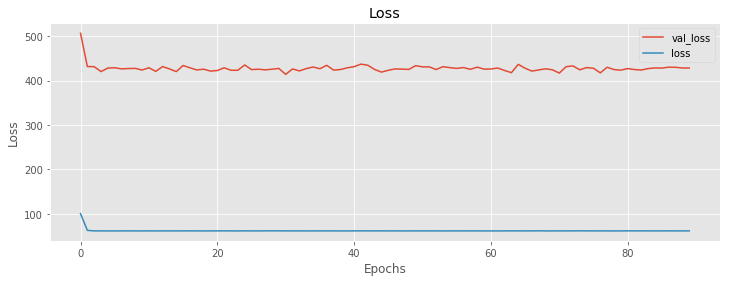

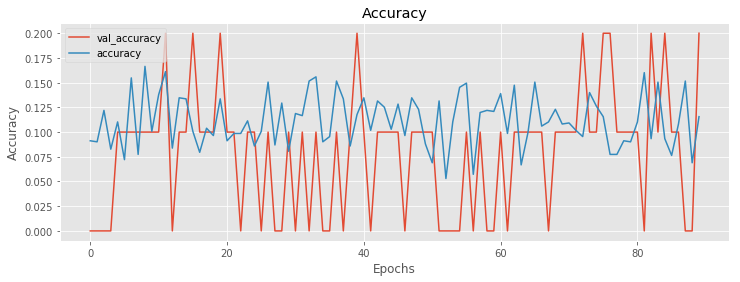

In [244]:
visualize_training_results(res)

### Visualizing the Predictions

#### Plotting the difference between the Actual closing prices and the Predicted prices

Predicted:
 [10.615530967712402, 10.599778175354004, 10.60051441192627, 10.61814022064209, 10.591712951660156, 10.605931282043457, 10.609068870544434, 10.584506034851074, 10.614899635314941, 10.622213363647461, 10.623857498168945, 10.621299743652344]

Actual:
 [28.219998999999998, 27.959999, 27.5, 26.440001000000002, 27.41, 32.41, 30.360001, 29.1, 30.370001000000002, 31.5, 33.209998999999996, 32.509997999999996]


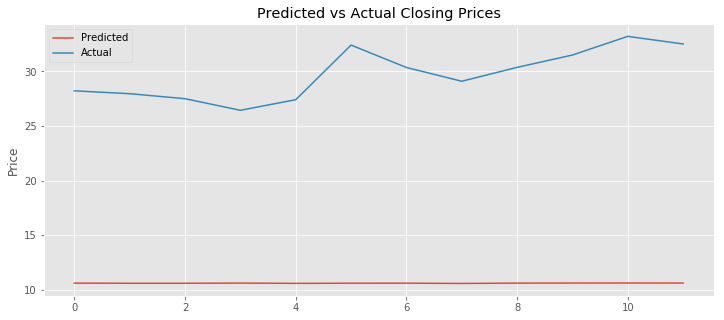

In [245]:
plt.figure(figsize=(12,5))
# Getting predictions
yhat = model.predict(X[-n_per_out].reshape(1, n_per_in, n_features)).tolist()[0]

# Printing and plotting those predictions
print("Predicted:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual:\n", y[-n_per_out].tolist())
plt.plot(y[-n_per_out].tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

#### Predicting/Forecasting the future prices

Predicted Prices:
 [25.902799606323242, 26.173965454101562, 26.552001953125, 26.507766723632812, 26.751506805419922, 26.763776779174805, 26.82514190673828, 26.988262176513672, 27.111133575439453, 26.997440338134766, 27.032026290893555, 27.092069625854492]


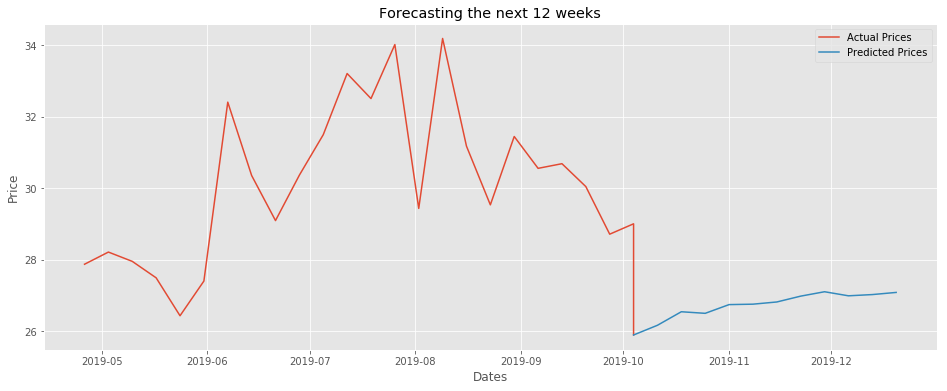

In [239]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]
print("Predicted Prices:\n",yhat)

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="1W-FRI"))

# Number of periods back to visualize the actual values
pers = 24

# Plotting
plt.figure(figsize=(16,6))
plt.plot(df.Close.tail(pers).append(preds.head(1)), label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} weeks")
plt.legend()
plt.show()